In [13]:
import pandas as pd
from glob import glob

In [16]:
dfc = pd.read_excel('../../../00_data/ITRP_dataset_latest.xlsx', sheet_name = 'Kim', index_col=0)

In [19]:
dft = pd.read_csv('../IRNet///data/Kim_counts_irnet.txt',sep='\t', index_col=0)

In [22]:
dfs = pd.read_csv('./results/Kim_EMS_output.csv', index_col=0, header=None)
dfs.columns = ['ENLIGHT']
dfs.index = dft.columns
dfs.to_csv('./results/Kim_EMS_score.csv')

In [23]:
df = dfc.join(dfs)
df.head()

,Patient_id,Sample_id,response_label,RECIST,Timing,cohort,cancer_type,sequencer,ICI,ICI_target,...,Response,TCGA_subtype,Mutation_load,TMB,EBV,Pathology,PDL_Tumor,PDL_Immune,PDL_CPS,ENLIGHT
Index,,,,,,,,,,,,,,,,,,,,,
Kim_NatMed_2018-p602-ar-987,PB-16-002,Kim_NatMed_2018-p602-ar-987,NR,PD,Pre,Kim,STAD,HiSeq2500,Pembro,PD1,...,NR,CIN,169,3.76,0,M/D adeno,0.0,0.0,0.0,0.000000
Kim_NatMed_2018-p603-ar-988,PB-16-003,Kim_NatMed_2018-p603-ar-988,NR,SD,Pre,Kim,STAD,HiSeq2500,Pembro,PD1,...,NR,CIN,68,1.51,0,P/D adeno,0.0,0.0,0.0,0.407864
Kim_NatMed_2018-p604-ar-989,PB-16-004,Kim_NatMed_2018-p604-ar-989,NR,PD,Pre,Kim,STAD,HiSeq2500,Pembro,PD1,...,NR,GS,277,6.16,0,P/D adeno,0.0,0.0,0.0,0.222412
Kim_NatMed_2018-p605-ar-990,PB-16-005,Kim_NatMed_2018-p605-ar-990,R,PR,Pre,Kim,STAD,HiSeq2500,Pembro,PD1,...,R,GS,262,5.82,0,P/D adeno,NaN,NaN,NaN,0.492479
Kim_NatMed_2018-p618-ar-991,PB-16-018,Kim_NatMed_2018-p618-ar-991,NR,PD,Pre,Kim,STAD,HiSeq2500,Pembro,PD1,...,NR,GS,368,8.18,0,M/D adeno,0.0,1.0,1.0,0.449216


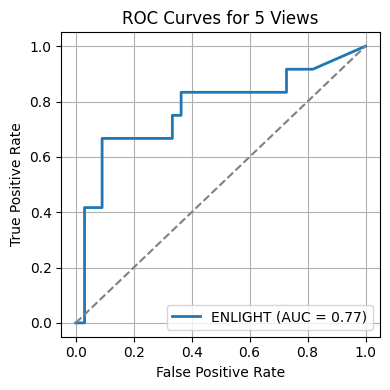

In [25]:
import pandas as pd
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 将响应标签转换为二进制标签
df['label_bin'] = df['response_label'].map({'R': 1, 'NR': 0})

# 初始化绘图
plt.figure(figsize=(4, 4))

# 为每一列绘制 ROC 曲线
for col in ['ENLIGHT']:
    fpr, tpr, _ = roc_curve(df['label_bin'], df[col])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{col} (AUC = {roc_auc:.2f})')

# 添加对角线、图例等
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for 5 Views')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()